In [1]:
import os
os.chdir('/content/drive/MyDrive/Fraud Detection')

In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [3]:
main_df = pd.read_csv('/content/drive/MyDrive/Fraud Detection/Fraud.csv')

In [4]:
main_df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [ ]:
#main_dict = pd.read_csv("/content/drive/MyDrive/Fraud Detection/Data Dictionary.txt", sep=" - ", header=None)
#main_dict

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,0,1
0,step,maps a unit of time in the real world. In this...
1,type,"CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER."
2,amount,amount of the transaction in local currency.
3,nameOrig,customer who started the transaction
4,oldbalanceOrg,initial balance before the transaction
5,newbalanceOrig,new balance after the transaction
6,nameDest,customer who is the recipient of the transaction
7,oldbalanceDest,initial balance recipient before the transacti...
8,newbalanceDest,new balance recipient after the transaction. N...
9,isFraud,This is the transactions made by the fraudulen...


Now every column in main_df has an explaination in main_dict. It helps in filtering out meaningful rows , hence meaningful columns from main_df for processing.

In [ ]:
#main_dict.columns = ['Features', 'Feature_explaination']

In [ ]:
#main_dict

,Features,Feature_explaination
0,step,maps a unit of time in the real world. In this...
1,type,"CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER."
2,amount,amount of the transaction in local currency.
3,nameOrig,customer who started the transaction
4,oldbalanceOrg,initial balance before the transaction
5,newbalanceOrig,new balance after the transaction
6,nameDest,customer who is the recipient of the transaction
7,oldbalanceDest,initial balance recipient before the transacti...
8,newbalanceDest,new balance recipient after the transaction. N...
9,isFraud,This is the transactions made by the fraudulen...


In [ ]:
#main_dict.to_csv('/content/drive/MyDrive/Fraud Detection/main_dict.csv')

In [5]:
schema_df = pd.read_csv('/content/drive/MyDrive/Fraud Detection/main_dict.csv')

###check for missing/null values in main fraud df

In [6]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [7]:
main_df.isnull().any()

step              False
type              False
amount            False
nameOrig          False
oldbalanceOrg     False
newbalanceOrig    False
nameDest          False
oldbalanceDest    False
newbalanceDest    False
isFraud           False
isFlaggedFraud    False
dtype: bool

""No null values!""

In [8]:
main_df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [ ]:
#os.mkdir('Plot')

In [9]:
main_df.isFraud.value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

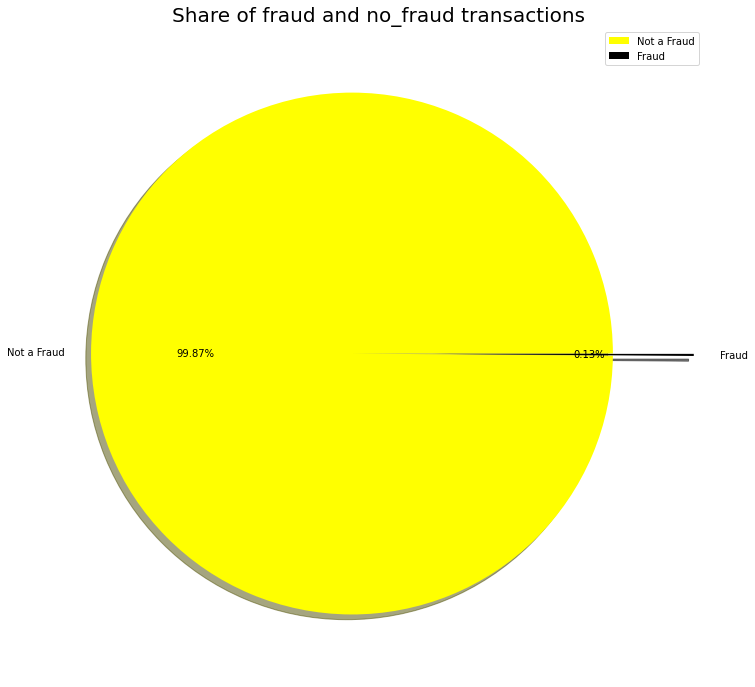

In [10]:
labels = ['Not a Fraud', 'Fraud']
colors = ['yellow', 'black']
size = [6354407, 8213]
explode = [0.1, 0.21]

plt.rcParams['figure.figsize'] = (12, 12)
plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True, autopct='%1.2f%%')
plt.axis('off')
plt.title('Share of fraud and no_fraud transactions',fontsize = 20)
plt.legend()
plt.show()
#plt.savefig('/content/drive/MyDrive/Fraud Detection/Plot/fraud_Nofraud_transactions.png')

Dataset is clearly imbalanced with only 0.13% in Fraud transactions. 

In [11]:
main_df.isFlaggedFraud.value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

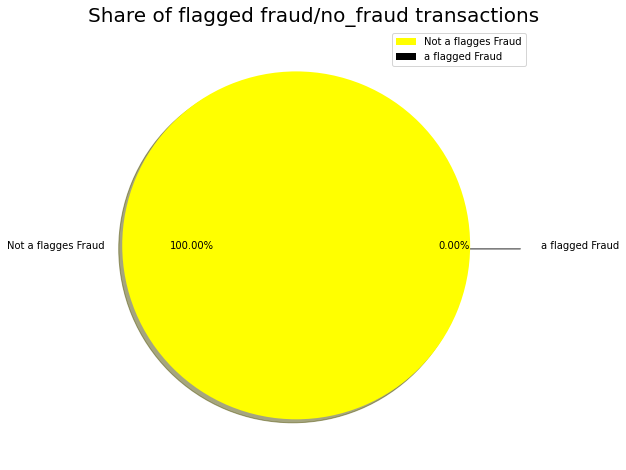

In [12]:
labels = ['Not a flagges Fraud', 'a flagged Fraud']
colors = ['yellow', 'black']
size = [6354407, 16]
explode = [0.1, 0.21]

plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True, autopct='%1.2f%%')
plt.axis('off')
plt.title('Share of flagged fraud/no_fraud transactions',fontsize = 20)
plt.legend()
plt.show()
#plt.savefig('/content/drive/MyDrive/Fraud Detection/Plot/flagged.png')

In [13]:
main_df['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

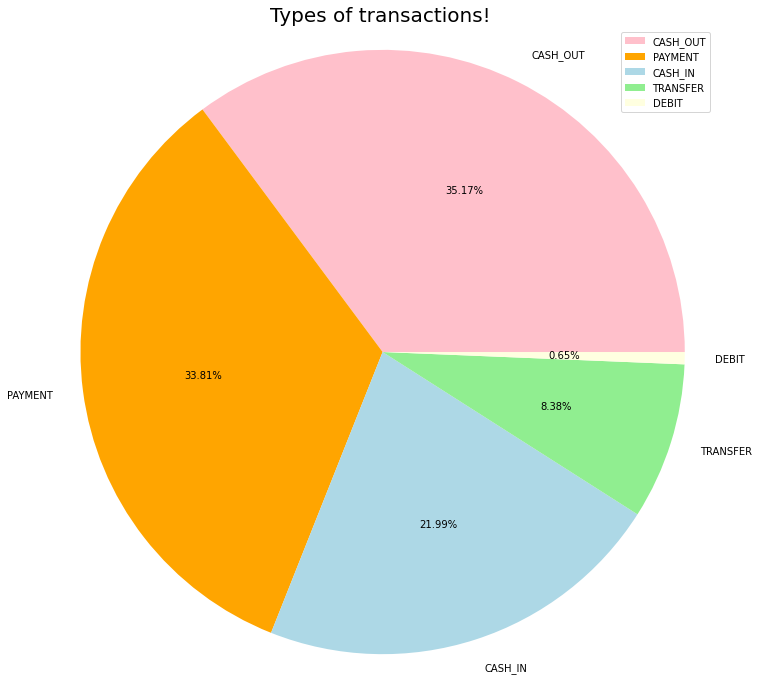

In [14]:

labels = ['CASH_OUT', 'PAYMENT', 'CASH_IN', 'TRANSFER', 'DEBIT']

colors = ['pink', 'orange', 'lightblue', 'lightgreen', 'lightyellow']
size = [2237500, 2151495, 1399284, 532909, 41432]


plt.rcParams['figure.figsize'] = (12, 12)
plt.pie(size, labels = labels, colors = colors, autopct='%1.2f%%')
plt.axis('equal')
plt.title('Types of transactions!',fontsize = 20)
plt.legend()
plt.show()
#plt.savefig('/content/drive/MyDrive/Fraud Detection/Plot/transaction_type.png')

In [16]:
fraud = (main_df['isFraud']==1)

In [17]:
main_df.loc[fraud, ['type']].value_counts()

type    
CASH_OUT    4116
TRANSFER    4097
dtype: int64

Clearly, the fraudulant transactions have occurred only from 'Cash_out' and 'transfer' types pf transaction.

No handles with labels found to put in legend.


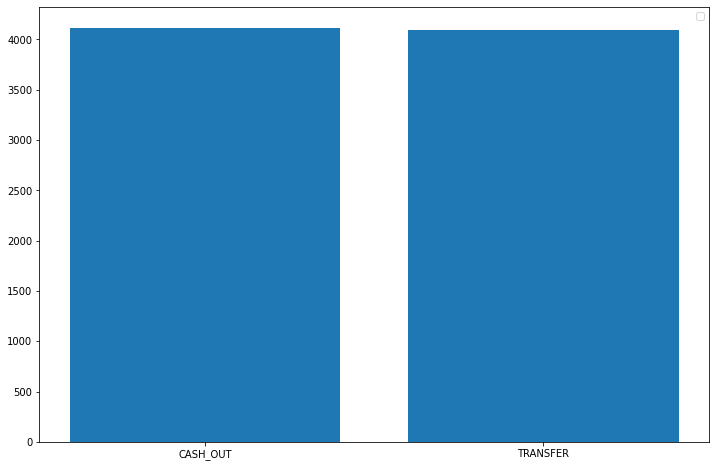

In [18]:
plt.figure(figsize=(12,8))
plt.bar(['CASH_OUT', 'TRANSFER'], [4116, 4097] )
plt.legend()
plt.show()
#plt.savefig('/content/drive/MyDrive/Fraud Detection/Plot/fraudulant_types_of_tran.png')

In [19]:
main_df.step.value_counts().nunique()

428

428 different steps/time_units involved in the transaction.


In [20]:
main_df.loc[fraud, ['step']].value_counts()

step
212     40
523     30
425     28
249     28
730     28
        ..
168      2
23       2
471      2
426      2
525      2
Length: 741, dtype: int64

In [21]:
main_df.loc[fraud, ['step']].max()

step    743
dtype: int64

In [22]:
a = main_df.nlargest(30, ['amount'])


In [23]:
a

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
3686583,276,TRANSFER,92445516.64,C1715283297,0.00,0.0,C439737079,9.595980e+03,9.245511e+07,0,0
4060598,300,TRANSFER,73823490.36,C2127282686,0.00,0.0,C753026640,9.362401e+07,1.674475e+08,0,0
4146397,303,TRANSFER,71172480.42,C2044643633,0.00,0.0,C84111522,1.134615e+08,1.846340e+08,0,0
3946920,286,TRANSFER,69886731.30,C1425667947,0.00,0.0,C167875008,1.515387e+08,2.214254e+08,0,0
3911956,284,TRANSFER,69337316.27,C1584456031,0.00,0.0,C1472140329,1.130072e+08,1.823446e+08,0,0
3937152,286,TRANSFER,67500761.29,C811810230,0.00,0.0,C1757599079,8.635615e+07,1.538569e+08,0,0
4105338,302,TRANSFER,66761272.21,C420748282,0.00,0.0,C1073241084,6.874206e+07,1.355033e+08,0,0
3892529,284,TRANSFER,64234448.19,C1139847449,0.00,0.0,C65111466,6.597691e+07,1.663021e+08,0,0
3991638,298,TRANSFER,63847992.58,C300140823,0.00,0.0,C514940761,7.217149e+07,1.360195e+08,0,0
4143801,303,TRANSFER,63294839.63,C372535854,0.00,0.0,C1871605747,7.512528e+07,1.384201e+08,0,0


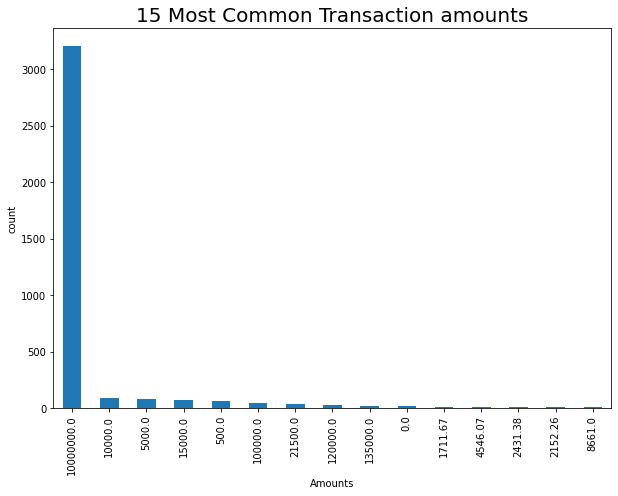

<Figure size 720x504 with 0 Axes>

In [24]:
plt.rcParams['figure.figsize'] = (10, 7)

main_df['amount'].value_counts().head(15).plot.bar()
plt.title('15 Most Common Transaction amounts', fontsize = 20)
plt.xlabel('Amounts')
plt.ylabel('count')
plt.show()
plt.savefig('/content/drive/MyDrive/Fraud Detection/Plot/15_common_transac.png')


####type of transaction where is_flagged is set to fraud:

In [26]:
is_flagged = (main_df['isFlaggedFraud'] == 1)
main_df.loc[is_flagged, ['type'] ].value_counts()

type    
TRANSFER    16
dtype: int64

Only 'TRANSFER" type of transaction is set to flagged as fraud !

Let's find out the situations, when after transaction, the balance is 0 in the origin account!

In [29]:
bal_0 = main_df.loc[(main_df.oldbalanceOrg != 0) & (main_df.newbalanceOrig == 0) & (main_df.isFraud==1)]
bal_0

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


From above 'bal_0', we can see that, of all fraudulant transaction(8213); 8012 were such cases, when the agent transferred all the money from the origin account to a new dest account, hence, making the origin account balance = 0



*   This is an important factor in defining fraudulant transactions!



Now, let's see , at the new balance destination; 
if, before the money was sent into the dest_account, the balance was 0.
and, after the money was sent, the new amount has significantly increased. 

In [30]:
new_bal_0 = main_df.loc[(main_df.oldbalanceDest == 0) & (main_df.newbalanceDest != 0) & (main_df.isFraud == 1)]
new_bal_0

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
970,1,CASH_OUT,1277212.77,C467632528,1277212.77,0.0,C716083600,0.0,2444985.19,1,0
1911,1,CASH_OUT,132842.64,C13692003,4499.08,0.0,C297927961,0.0,132842.64,1,0
2302,1,CASH_OUT,235238.66,C1499825229,235238.66,0.0,C2100440237,0.0,235238.66,1,0
3060,2,CASH_OUT,1096187.24,C77163673,1096187.24,0.0,C644345897,0.0,1096187.24,1,0
4104,3,CASH_OUT,10539.37,C1984954272,10539.37,0.0,C124540047,0.0,10539.37,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362595,741,CASH_OUT,144945.34,C1092829426,144945.34,0.0,C716019997,0.0,144945.34,1,0
6362601,742,CASH_OUT,652993.91,C1614818636,652993.91,0.0,C362803701,0.0,652993.91,1,0
6362603,742,CASH_OUT,1819543.69,C1039979813,1819543.69,0.0,C2078394828,0.0,1819543.69,1,0
6362605,742,CASH_OUT,54652.46,C43545501,54652.46,0.0,C830041824,0.0,54652.46,1,0


So, out of 8213 fraudulant transactions, 1275 were such, in which there was single steep increase in balance amount from 0 to new_balance!

Let's check the 'type' of this(new_bal_0) transaction.!

In [31]:
new_bal_0.type.value_counts()

CASH_OUT    1251
TRANSFER      24
Name: type, dtype: int64

We can see, most of these types of transactions were carried out via 'CASH_OUT' type! (Taking the cash from 'oldbalanceOrg' to 'newbalanceDest')

Let's find out the minimum and maximum value of 'newbalanceDest'

In [32]:
new_bal_0.newbalanceDest.max()

10000000.0

In [33]:
new_bal_0.newbalanceDest.min()

63.8

In [34]:
new_bal_0.sort_values(by='newbalanceDest').head(20)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
4965642,351,CASH_OUT,63.80,C1861878353,63.80,0.0,C958479953,0.0,63.80,1,0
3828477,282,CASH_OUT,481.90,C1550404479,481.90,0.0,C1582825770,0.0,481.90,1,0
683723,36,CASH_OUT,636.00,C1789723757,636.00,0.0,C236701409,0.0,636.00,1,0
5987964,413,CASH_OUT,781.93,C823598101,781.93,0.0,C1338255129,0.0,781.93,1,0
6258429,599,CASH_OUT,1074.81,C311553753,1074.81,0.0,C832994416,0.0,1074.81,1,0
3645682,275,CASH_OUT,1436.38,C765019511,1436.38,0.0,C1267603990,0.0,1436.38,1,0
6272979,629,CASH_OUT,1650.08,C1176430814,1650.08,0.0,C237441697,0.0,1650.08,1,0
6279178,643,CASH_OUT,1707.40,C933301215,1707.40,0.0,C306147226,0.0,1707.40,1,0
708913,37,CASH_OUT,1842.00,C323132484,1842.00,0.0,C1737682079,0.0,1842.00,1,0
1059589,106,CASH_OUT,2231.46,C967408302,2231.46,0.0,C2089340835,0.0,2231.46,1,0


In [35]:
new_bal_0.sort_values(by='newbalanceDest').tail(20)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
5988246,414,CASH_OUT,10000000.0,C2071282373,10000000.0,0.0,C803763593,0.0,10000000.0,1,0
5563724,387,CASH_OUT,10000000.0,C99029817,10000000.0,0.0,C428927923,0.0,10000000.0,1,0
5563712,387,CASH_OUT,10000000.0,C866227621,10000000.0,0.0,C1759432374,0.0,10000000.0,1,0
5563710,387,CASH_OUT,10000000.0,C1036572575,10000000.0,0.0,C469591174,0.0,10000000.0,1,0
6168494,554,CASH_OUT,10000000.0,C2038780073,10000000.0,0.0,C1355993578,0.0,10000000.0,1,0
5563706,387,CASH_OUT,10000000.0,C618976547,10000000.0,0.0,C1908782637,0.0,10000000.0,1,0
5996402,425,CASH_OUT,10000000.0,C749563037,10000000.0,0.0,C606914329,0.0,10000000.0,1,0
5996406,425,CASH_OUT,10000000.0,C792080060,10000000.0,0.0,C2030266969,0.0,10000000.0,1,0
2897551,228,CASH_OUT,10000000.0,C2022162818,10000000.0,0.0,C1201081149,0.0,10000000.0,1,0
6296769,680,CASH_OUT,10000000.0,C466387318,10000000.0,0.0,C1396306912,0.0,10000000.0,1,0


In [37]:
probable_illegal_attempt = (main_df['amount'] > 200.0)
amt = main_df.loc[probable_illegal_attempt & (main_df.isFraud==1)]
amt

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1,0
681,1,CASH_OUT,20128.00,C1118430673,20128.00,0.0,C339924917,6268.00,12145.85,1,0
724,1,CASH_OUT,416001.33,C749981943,0.00,0.0,C667346055,102.00,9291619.62,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


Of the total 8213 fraud transactions, 8181 were those with amount more than 200.0 , which is an important factor for prediction!

In [38]:
amt1 = main_df.loc[(main_df.amount < 200.0) & (main_df.isFraud==1)]
amt1

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
12179,7,TRANSFER,164.00,C1455969984,164.00,0.0,C2119910556,0.00,0.00,1,0
12180,7,CASH_OUT,164.00,C1173659886,164.00,0.0,C1769947269,4068.00,0.00,1,0
277265,15,TRANSFER,119.00,C1995557473,119.00,0.0,C1480876722,0.00,0.00,1,0
277266,15,CASH_OUT,119.00,C1584512618,119.00,0.0,C2102058838,4844060.13,4844179.13,1,0
301801,15,TRANSFER,170.00,C553034695,170.00,0.0,C26381896,0.00,0.00,1,0
301802,15,CASH_OUT,170.00,C1065370362,170.00,0.0,C200064275,413421.36,345764.15,1,0
1796322,162,TRANSFER,151.00,C1172437299,151.00,0.0,C315826176,0.00,0.00,1,0
1796323,162,CASH_OUT,151.00,C790340353,151.00,0.0,C517676411,386163.34,386314.34,1,0


Let's check to see if there was 0 amount of transacaction

In [48]:
amount_0 = main_df.loc[main_df.amount == 0.0]
amount_0 = pd.DataFrame(amount_0)
amount_0


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736447,212,CASH_OUT,0.0,C1510987794,0.0,0.0,C1696624817,0.00,0.00,1,0
3247298,250,CASH_OUT,0.0,C521393327,0.0,0.0,C480398193,0.00,0.00,1,0
3760289,279,CASH_OUT,0.0,C539112012,0.0,0.0,C1106468520,538547.63,538547.63,1,0
5563714,387,CASH_OUT,0.0,C1294472700,0.0,0.0,C1325541393,7970766.57,7970766.57,1,0
5996408,425,CASH_OUT,0.0,C832555372,0.0,0.0,C1462759334,76759.90,76759.90,1,0
5996410,425,CASH_OUT,0.0,C69493310,0.0,0.0,C719711728,2921531.34,2921531.34,1,0
6168500,554,CASH_OUT,0.0,C10965156,0.0,0.0,C1493336195,230289.66,230289.66,1,0
6205440,586,CASH_OUT,0.0,C1303719003,0.0,0.0,C900608348,1328472.86,1328472.86,1,0
6266414,617,CASH_OUT,0.0,C1971175979,0.0,0.0,C1352345416,0.00,0.00,1,0
6281483,646,CASH_OUT,0.0,C2060908932,0.0,0.0,C1587892888,0.00,0.00,1,0


In [49]:
amount_0.amount.value_counts()

0.0    16
Name: amount, dtype: int64

There are 16 cases where there has been no amount transaction, yet it is classified as Fraud. Let's deep dive into this and figure out if these can be removed from the dataset!



*   These are all categorised as CASHOUTs!
*   origin_account_old_balance == origin_account_new_balance
*   Destination_account_old_balance == destination_account_new_balance


Let's remove them and see what happens!





In [50]:
dummy_df = main_df.copy()

In [51]:
dummy_df = dummy_df[dummy_df.amount != 0.0]

In [53]:
main_df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [52]:
dummy_df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [54]:

dataTransfer = dummy_df.loc[dummy_df['type'] == 'TRANSFER']

dataTransfer = pd.DataFrame(dataTransfer)

dataTransfer.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
19,1,TRANSFER,215310.30,C1670993182,705.00,0.0,C1100439041,22425.00,0.00,0,0
24,1,TRANSFER,311685.89,C1984094095,10835.00,0.0,C932583850,6267.00,2719172.89,0,0
58,1,TRANSFER,62610.80,C1976401987,79114.00,16503.2,C1937962514,517.00,8383.29,0,0
78,1,TRANSFER,42712.39,C283039401,10363.39,0.0,C1330106945,57901.66,24044.18,0,0
79,1,TRANSFER,77957.68,C207471778,0.00,0.0,C1761291320,94900.00,22233.65,0,0
80,1,TRANSFER,17231.46,C1243171897,0.00,0.0,C783286238,24672.00,0.00,0,0
81,1,TRANSFER,78766.03,C1376151044,0.00,0.0,C1749186397,103772.00,277515.05,0,0
82,1,TRANSFER,224606.64,C873175411,0.00,0.0,C766572210,354678.92,0.00,0,0
83,1,TRANSFER,125872.53,C1443967876,0.00,0.0,C392292416,348512.00,3420103.09,0,0


dataset containing fraudflagged set with oldoriginal balnce == new original balance!

In [55]:
dataTransfer.loc[(dataTransfer.isFlaggedFraud==1) & (dataTransfer.oldbalanceOrg == dataTransfer.newbalanceOrig)].sort_values(by='oldbalanceOrg').tail(15)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
3760288,279,TRANSFER,536624.41,C1035541766,536624.41,536624.41,C1100697970,0.0,0.0,1,1
3247297,250,TRANSFER,1343002.08,C1100582606,1343002.08,1343002.08,C1147517658,0.0,0.0,1,1
6266413,617,TRANSFER,2542664.27,C786455622,2542664.27,2542664.27,C661958277,0.0,0.0,1,1
6351225,702,TRANSFER,3171085.59,C1892216157,3171085.59,3171085.59,C1308068787,0.0,0.0,1,1
6296014,671,TRANSFER,3441041.46,C917414431,3441041.46,3441041.46,C1082139865,0.0,0.0,1,1
6168499,554,TRANSFER,3576297.10,C193696150,3576297.10,3576297.10,C484597480,0.0,0.0,1,1
5563713,387,TRANSFER,4892193.09,C908544136,4892193.09,4892193.09,C891140444,0.0,0.0,1,1
2736446,212,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.0,0.0,1,1
6362584,741,TRANSFER,5674547.89,C992223106,5674547.89,5674547.89,C1366804249,0.0,0.0,1,1
6281482,646,TRANSFER,10000000.00,C19004745,10399045.08,10399045.08,C1806199534,0.0,0.0,1,1


In [56]:
dataTransfer.loc[(dataTransfer['isFlaggedFraud'] == 0) & (dataTransfer.oldbalanceDest == dataTransfer.newbalanceDest)].sort_values(by = 'oldbalanceOrg').tail(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
5996403,425,TRANSFER,10000000.0,C1619838170,39585040.37,29585040.37,C1934167334,0.0,0.0,1,0
6281476,646,TRANSFER,10000000.0,C130070267,40399045.08,30399045.08,C970791522,0.0,0.0,1,0
6266405,617,TRANSFER,10000000.0,C794290057,42542664.27,32542664.27,C262998076,0.0,0.0,1,0
5563705,387,TRANSFER,10000000.0,C576718894,44892193.09,34892193.09,C673002421,0.0,0.0,1,0
6362576,741,TRANSFER,10000000.0,C780743034,45674547.89,35674547.89,C491519946,0.0,0.0,1,0
6362454,730,TRANSFER,10000000.0,C507645439,47316255.05,37316255.05,C270374999,0.0,0.0,1,0
5996401,425,TRANSFER,10000000.0,C1551381510,49585040.37,39585040.37,C1042012237,0.0,0.0,1,0
6281474,646,TRANSFER,10000000.0,C590657619,50399045.08,40399045.08,C1971187430,0.0,0.0,1,0
6362452,730,TRANSFER,10000000.0,C726730575,57316255.05,47316255.05,C1364745638,0.0,0.0,1,0
5996399,425,TRANSFER,10000000.0,C40489106,59585040.37,49585040.37,C650095152,0.0,0.0,1,0


In [57]:
print('Minimum Balance of oldbalanceOrig for  FlaggedFraud and Transfer mode:',
      dummy_df[(dummy_df.type == 'TRANSFER') & (dummy_df.isFlaggedFraud == 1) & (dummy_df.oldbalanceOrg == dummy_df.newbalanceOrig)].oldbalanceOrg.min())
print('Maximum Balance of oldbalanceOrig for non FlaggedFraud and Transfer mode:',
      dummy_df[(dummy_df.type == 'TRANSFER') & (dummy_df.isFlaggedFraud == 1) & (dummy_df.oldbalanceOrg == dummy_df.newbalanceOrig)].oldbalanceOrg.max())

Minimum Balance of oldbalanceOrig for  FlaggedFraud and Transfer mode: 353874.22
Maximum Balance of oldbalanceOrig for non FlaggedFraud and Transfer mode: 19585040.37


In [59]:
#dummy_df[‘changebalanceOrig’] = dummy_df[‘newbalanceOrig’] — dummy_df[‘oldbalanceOrg’]
#dummy_df[‘changebalanceDest’] = dummy_df[‘newbalanceDest’] — dummy_df[‘oldbalanceDest’]

Let's creat the final dtaset, removing all other transaction types and using 'TRANSFER" and 'CASH_OUT'

In [58]:
X = dummy_df.loc[(main_df.type=='TRANSFER') | (main_df.type == 'CASH_OUT')]
X.shape

(2770393, 11)

In [60]:
X['errorBalanceOrig'] = X.newbalanceOrig + X.amount - X.oldbalanceOrg
X['errorBalanceDest'] = X.oldbalanceDest + X.amount - X.newbalanceDest

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [61]:
X.shape

(2770393, 13)

In [62]:

X= X.drop(['nameDest','nameOrig'], axis = 1)

# checking the new shape of data
X.shape

(2770393, 11)

In [63]:
X['type'].replace('TRANSFER', 0, inplace = True)
X['type'].replace('CASH_OUT', 1, inplace = True)

In [64]:
X.shape

(2770393, 11)

In [65]:
X.head(10)



,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,errorBalanceOrig,errorBalanceDest
2,1,0,181.00,181.00,0.0,0.0,0.00,1,0,0.00,181.00
3,1,1,181.00,181.00,0.0,21182.0,0.00,1,0,0.00,21363.00
15,1,1,229133.94,15325.00,0.0,5083.0,51513.44,0,0,213808.94,182703.50
19,1,0,215310.30,705.00,0.0,22425.0,0.00,0,0,214605.30,237735.30
24,1,0,311685.89,10835.00,0.0,6267.0,2719172.89,0,0,300850.89,-2401220.00
42,1,1,110414.71,26845.41,0.0,288800.0,2415.16,0,0,83569.30,396799.55
47,1,1,56953.90,1942.02,0.0,70253.0,64106.18,0,0,55011.88,63100.72
48,1,1,5346.89,0.00,0.0,652637.0,6453430.91,0,0,5346.89,-5795447.02
51,1,1,23261.30,20411.53,0.0,25742.0,0.00,0,0,2849.77,49003.30
58,1,0,62610.80,79114.00,16503.2,517.0,8383.29,0,0,0.00,54744.51


In [66]:
X.to_csv('/content/drive/MyDrive/Fraud Detection/train_data.csv')